<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E5%A4%9A%E5%A4%89%E9%87%8F%E8%A7%A3%E6%9E%90%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 10

In [ ]:
# データの読み込み
df = pd.read_csv('academic_ability.csv')
df.head(3)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
0,2,3,4,3,3,4,3,2,3,2
1,5,4,3,3,3,2,4,3,4,5
2,3,3,3,4,3,4,3,4,4,3


In [ ]:
df.shape

(40, 10)

In [ ]:
df.describe()

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.450000,3.400000,3.400000,3.375000,3.350000,3.325000,3.450000,3.475000,3.550000,3.525000
std,1.197219,1.172331,1.215287,1.102154,1.098951,1.288758,0.985797,1.085747,1.060962,1.320208
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.750000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,4.250000,4.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


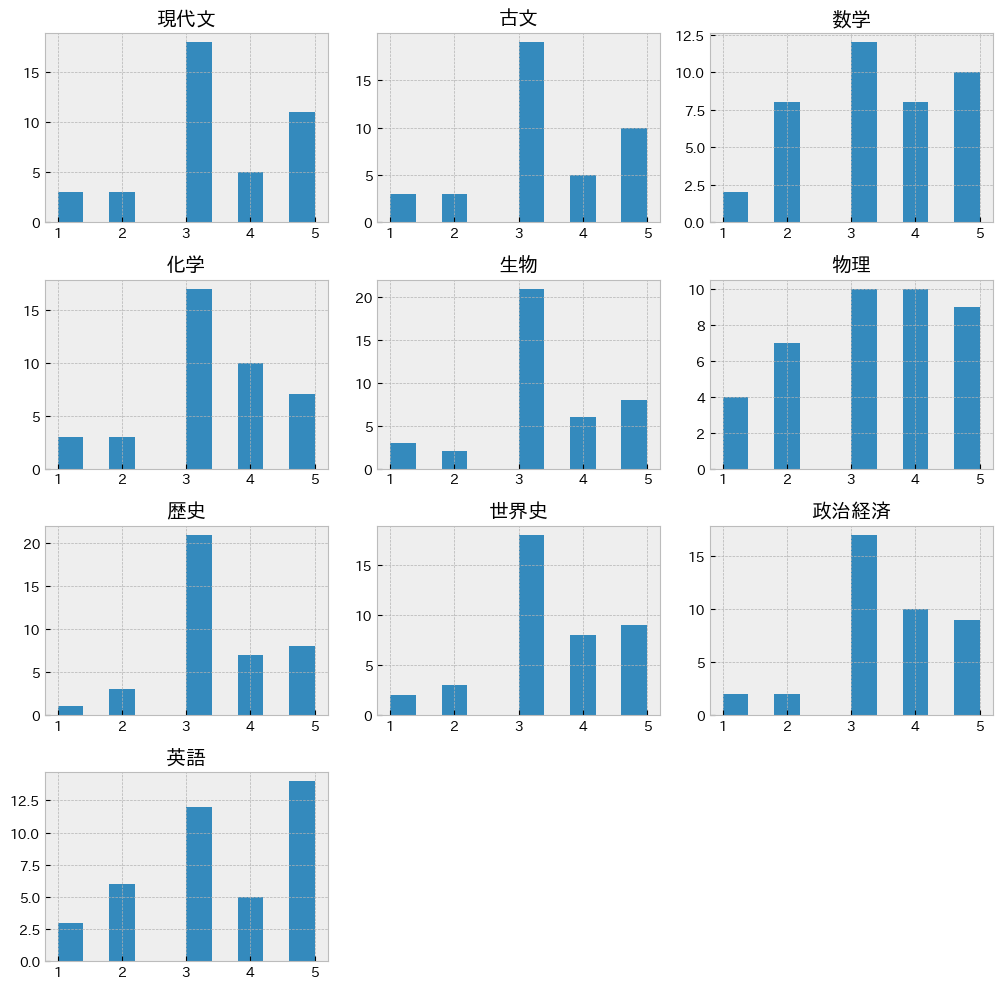

In [ ]:
df.hist()
plt.tight_layout()

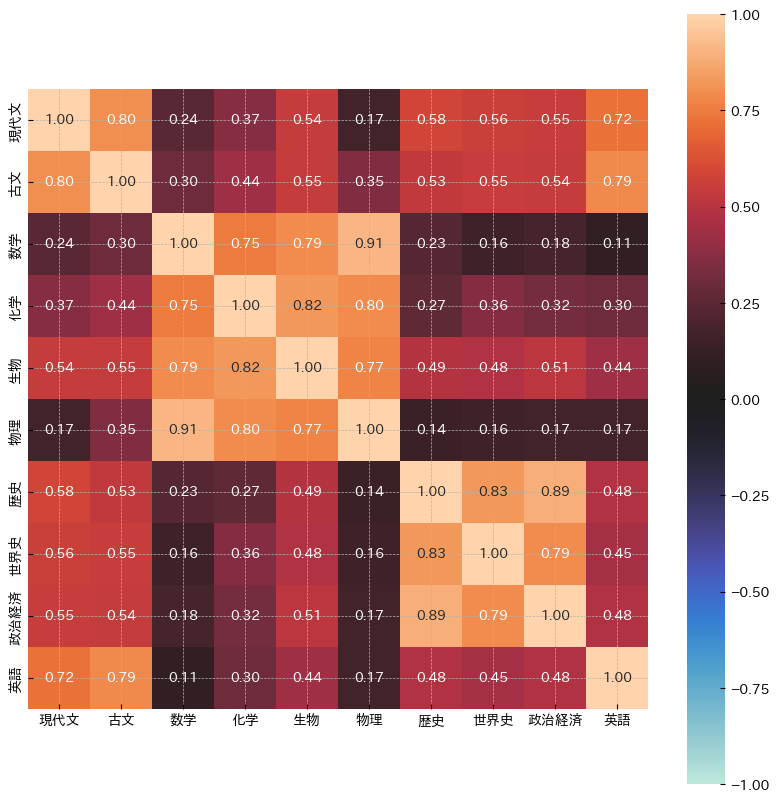

In [ ]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

#主成分分析の実行

In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_values = scaler.fit_transform(df)

In [ ]:
# 確認
df_scaled = pd.DataFrame(scaled_values, columns=df.columns)
df_scaled.head()

NameError: name 'scaled_values' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

# 数値データのみを対象にスケーリング
df_numeric = df.select_dtypes(include=['number'])  # 数値データのみ取得
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_numeric)  # スケーリング

# スケーリング後のデータフレームを作成
df_scaled = pd.DataFrame(scaled_values, columns=df_numeric.columns)
df_scaled.head()


,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
0,-1.226569,-0.345547,0.500000,-0.344577,-0.322543,0.530432,-0.462299,-1.375819,-0.525001,-1.169837
1,1.311160,0.518321,-0.333333,-0.344577,-0.322543,-1.041219,0.565032,-0.443060,0.429547,1.131481
2,-0.380659,-0.345547,-0.333333,0.574295,-0.322543,0.530432,-0.462299,0.489698,0.429547,-0.402731
3,1.311160,1.382189,-0.333333,-0.344577,-0.322543,-0.255393,0.565032,0.489698,0.429547,1.131481
4,0.465250,-0.345547,0.500000,1.493168,0.599008,-0.255393,-0.462299,-0.443060,0.429547,-0.402731


In [ ]:
#主成分分析のクラス（PCA）のインスタンス化
from sklearn.decomposition import PCA

pca = PCA(random_state=0)  #randam_stateがseedの扱い

In [ ]:
# 主成分分析を実行（fit()）し、主成分の生成（transform()）
feature = pca.fit_transform(df_scaled)

In [ ]:
# サイズの確認
feature.shape


(40, 10)

In [ ]:
#DataFrameにfeatureを格納
pd.DataFrame(
    feature,
    columns=[f'PC{x+1}' for x in range(len(df.columns))]#リスト内包表現
).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.582937,1.522060,-0.319377,-0.680331,-0.471073,0.310012,0.562323,-0.062166,0.312301,-0.076888
1,0.537827,-1.654101,1.080071,-0.613575,0.194434,-0.690422,0.164876,-0.479087,0.037316,0.212635
2,-0.107779,0.336046,-0.608438,0.895810,-0.093421,0.212990,0.346491,-0.051084,-0.624242,-0.164918
3,1.339368,-1.645856,1.095151,-0.272281,0.063357,0.447164,0.099699,-0.211740,-0.128337,-0.032590
4,0.518339,0.969427,-0.078046,0.495261,0.818791,-1.029864,0.726044,-0.225064,0.002689,0.476964


# 結果の解釈

- 寄与率・累積寄与率
- 主成分負荷量

# 寄与率・累積寄与率

In [ ]:
pca.explained_variance_ratio_

array([0.54174516, 0.23323638, 0.10293608, 0.03053852, 0.02943854,
       0.02358926, 0.01646657, 0.01096772, 0.00718357, 0.0038982 ])

In [ ]:
# 寄与率
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index=[f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

,寄与率
PC1,0.541745
PC2,0.233236
PC3,0.102936
PC4,0.030539
PC5,0.029439
PC6,0.023589
PC7,0.016467
PC8,0.010968
PC9,0.007184
PC10,0.003898


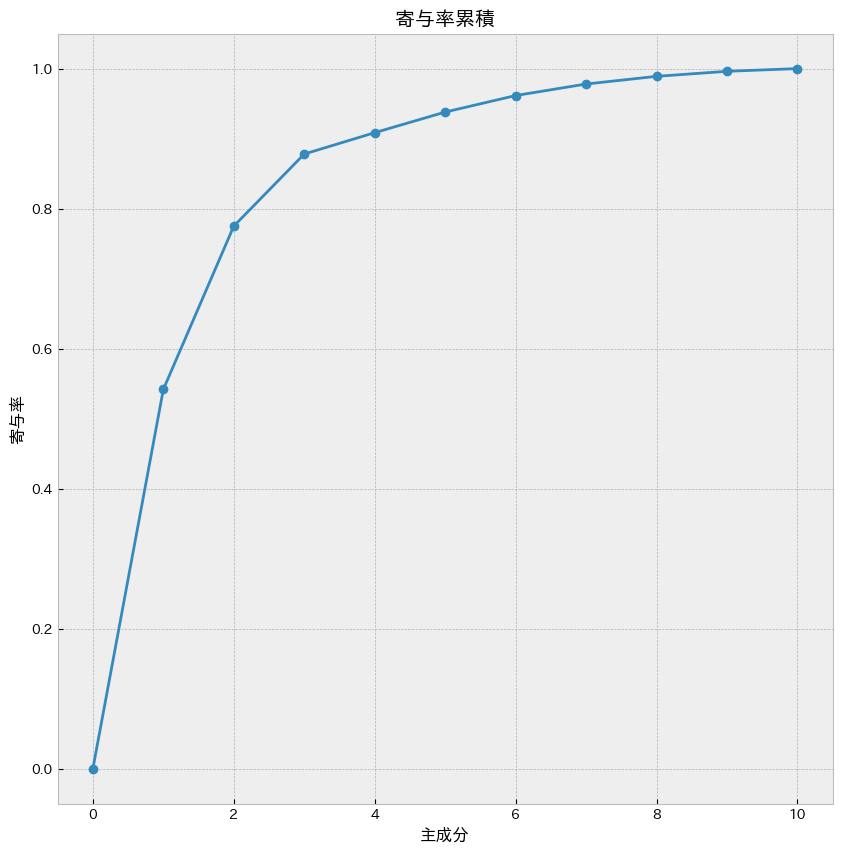

In [ ]:
#参考程度
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(variance_ratio)), '-o')
plt.title('寄与率累積')
plt.xlabel('主成分')
plt.ylabel('寄与率')
plt.show()

#主成分負荷量
- 固有値：各主成分の分散の大きさ
- 固有ベクトル：分散が最大になる方向

In [ ]:
# 固有ベクトル
eigenvector = pca.components_

pd.DataFrame(eigenvector,
             index=[f'PC{x+1}' for x in range(len(eigenvector))],
             columns=df_scaled.columns)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
PC1,0.330471,0.345861,0.264372,0.312252,0.371225,0.261427,0.323972,0.318760,0.324065,0.293324
PC2,-0.215454,-0.147589,0.472686,0.354349,0.251609,0.487920,-0.285686,-0.265534,-0.272543,-0.234572
PC3,0.352338,0.418284,-0.084606,-0.002393,-0.044721,-0.009705,-0.392747,-0.363047,-0.384869,0.507406
PC4,-0.256860,-0.011623,-0.459995,0.638958,-0.038767,-0.059016,-0.333653,0.426382,-0.060221,0.110849
PC5,0.678160,-0.079317,0.037859,0.170128,0.095616,-0.298730,-0.100190,0.184604,-0.262602,-0.540345
PC6,-0.142910,0.578022,0.113232,-0.239358,-0.388621,0.305380,-0.043586,0.426987,-0.240359,-0.298462
PC7,0.025355,0.408031,-0.181340,0.216001,-0.116020,0.002665,-0.171988,-0.450016,0.588067,-0.402421
PC8,-0.119172,0.123452,-0.172296,-0.451003,0.700474,-0.017178,-0.433175,0.186758,0.117271,-0.101179
PC9,-0.352286,0.389237,-0.057152,0.171071,0.340150,-0.399963,0.461027,-0.201125,-0.379757,-0.137742
PC10,-0.187015,0.099325,0.638617,0.055701,-0.124042,-0.589273,-0.325801,0.141556,0.196033,0.130320


In [ ]:
# 主成分負荷量
factor_loading = pca.components_ * np.sqrt(pca.explained_variance_).reshape(10,1)

df_factor_loading = pd.DataFrame(factor_loading,
            index=[f'PC{x+1}' for x in range(len(factor_loading))],
             columns=df_scaled.columns)

df_factor_loading.head(3)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
PC1,0.778985,0.815262,0.623175,0.736037,0.875048,0.616234,0.763665,0.751380,0.763885,0.691421
PC2,-0.333235,-0.228270,0.731086,0.548058,0.389155,0.754649,-0.441860,-0.410692,-0.421533,-0.362804
PC3,0.362027,0.429786,-0.086932,-0.002459,-0.045950,-0.009972,-0.403547,-0.373031,-0.395452,0.521359


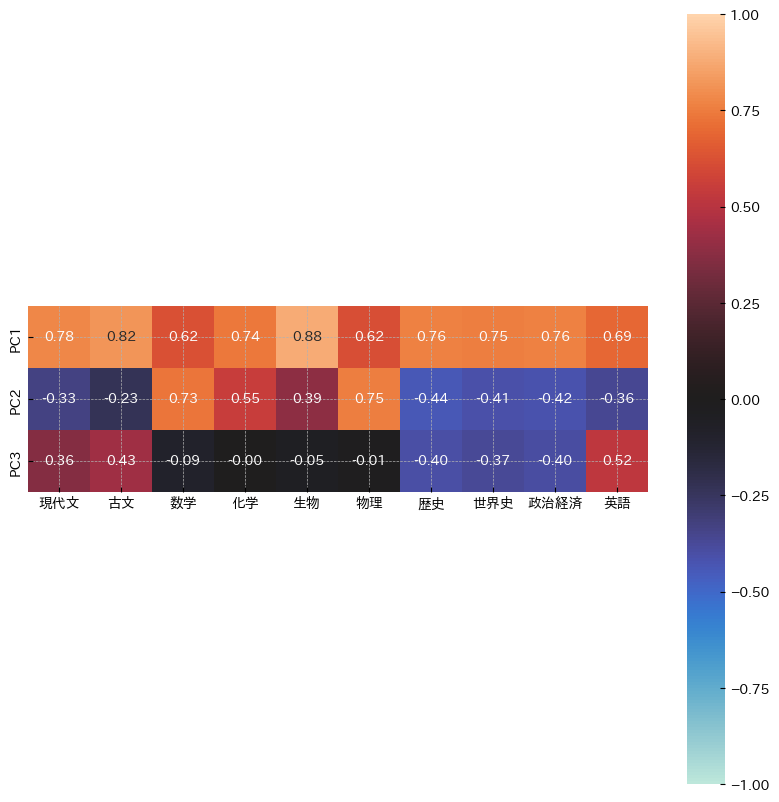

In [ ]:
sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

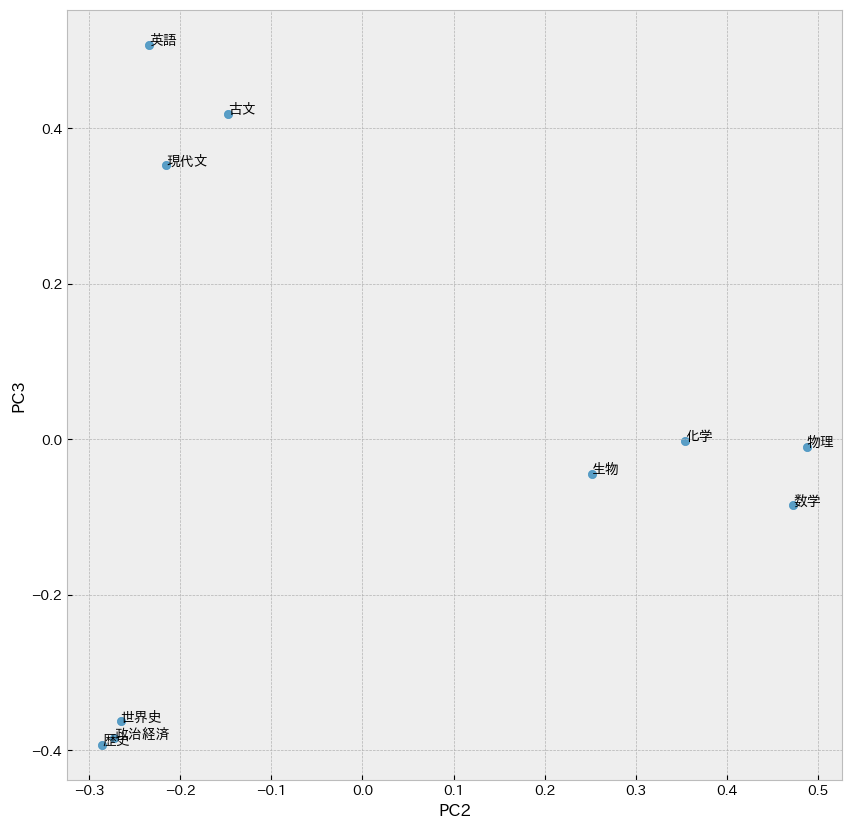

In [ ]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
for x, y, name in zip(pca.components_[1], pca.components_[2], df.columns):
    plt.text(x, y, name)

plt.scatter(pca.components_[1], pca.components_[2], alpha=0.8)

plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

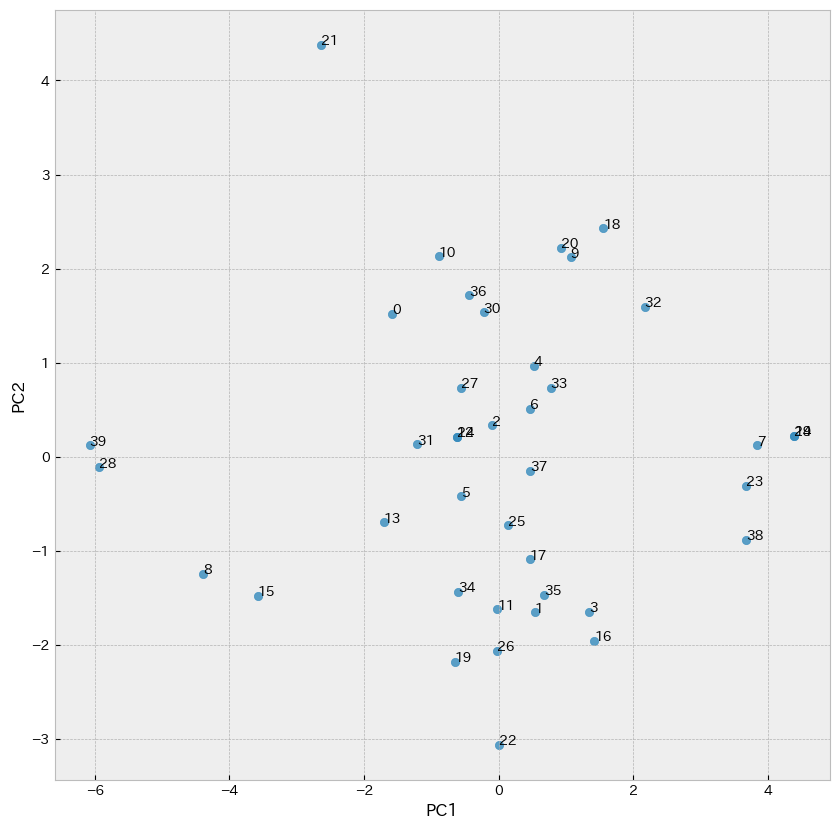

In [ ]:
# 第一主成分と第二主成分における主成分得点をプロットする
for x, y, name in zip(feature[:,0], feature[:, 1], list(range(len(feature)))):
    plt.text(x, y, name)

# x, y 軸の名前の追加
plt.xlabel('PC1')
plt.ylabel('PC2')

# 散布図の可視化
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, cmap='Blues');

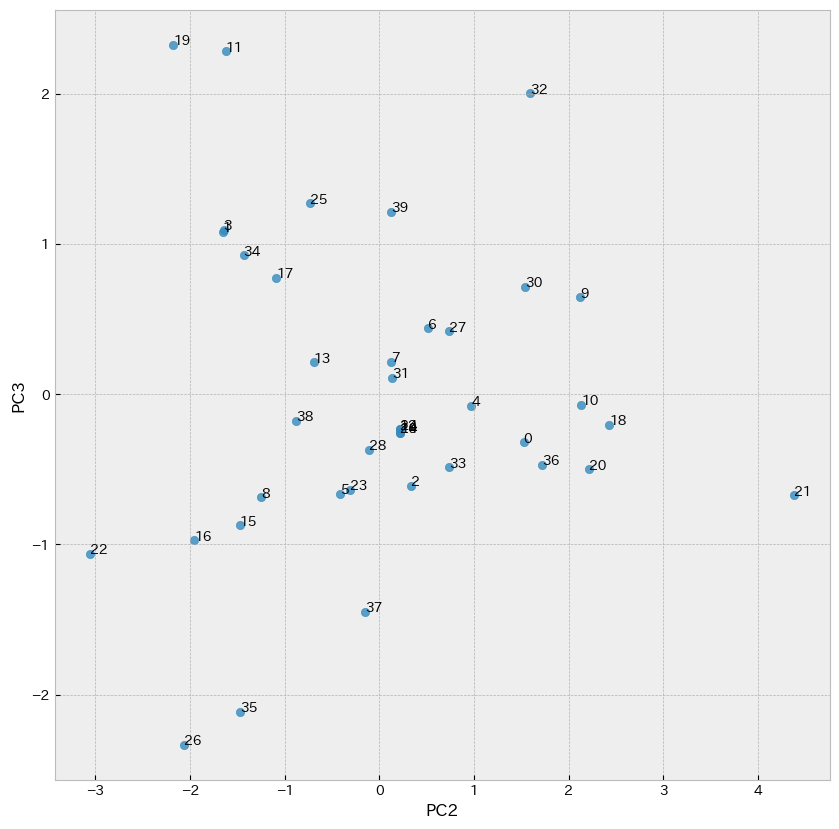

In [ ]:
# 第二主成分と第三主成分における主成分得点をプロットする
for x, y, name in zip(feature[:,1], feature[:, 2], list(range(len(feature)))):
    plt.text(x, y, name)

# x, y 軸の名前の追加
plt.xlabel('PC2')
plt.ylabel('PC3')

# 散布図の可視化
plt.scatter(feature[:, 1], feature[:, 2], alpha=0.8, cmap='Blues');

# 第一主成分の解釈

- どれも負の値であることが確認できます。更にそれぞれの値に大きな差もなく、第二主成分に比べおおよそ絶対値的に値が大きいことがわかります。よって、第一主成分は全体の成績を表す軸であると解釈できそうです。

- 元データの各科目の成績が高ければ第一主成分の値はマイナスに大きくなり、低い場合はその逆となります。

# 第二主成分の解釈

- 先程も触れましたが、第二主成分は正負の違いが以下のようにあります。

- 正の値 : 数学・化学・生物・物理
- 負の値 : 現代文・古文・歴史・世界史・政治経済・英語

# 第三主成分の解釈

- 第二主成分まででかなりうまく解釈ができていますので、第三主成分は解釈しなくても良いかもしれませんが、こちらも行っておきます。第三主成分は、理系科目が 0 に近く、文系科目が正または負の値が出ています。

- 正の値 : 歴史・世界史・政治経済
負の値 : 現代文・古文・英語
よって第三主成分は文系科目の言語系もしくは歴史系を分けるような軸と解釈できます。

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6
df = pd.read_csv('hotel_reviews.csv')
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [ ]:
# 数値型のデータのみ取得
df_numeric = df.select_dtypes(include='number').drop(['満足度'],axis=1)
df_numeric.head(3)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
0,50,4,4,4,4,3,4,4,4,4
1,35,4,5,4,4,1,1,5,4,1
2,22,1,1,1,4,1,5,1,3,1


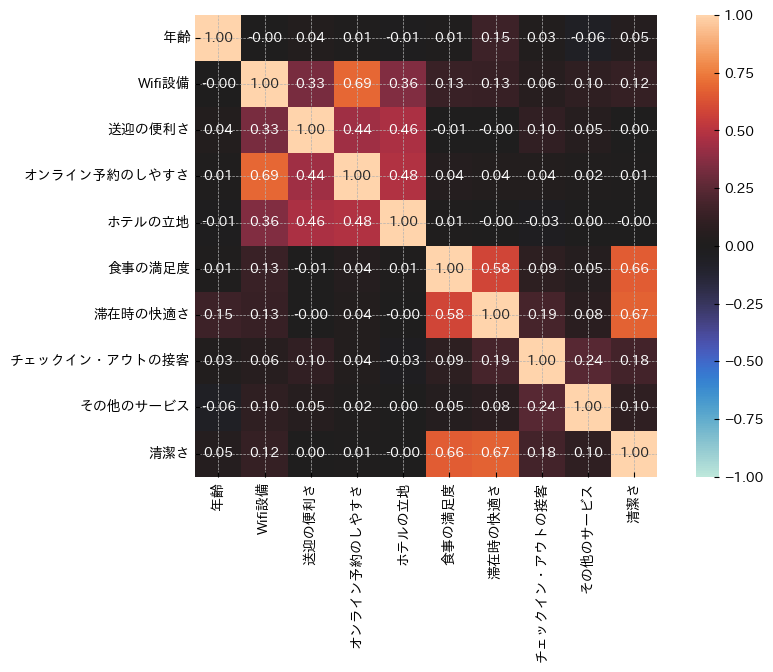

In [ ]:
# 相関の確認
sns.heatmap(df_numeric.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
# 不要カラムの削除
data = df_numeric.drop(['年齢'], axis=1)
data.head(3)

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
0,4,4,4,4,3,4,4,4,4
1,4,5,4,4,1,1,5,4,1
2,1,1,1,4,1,5,1,3,1


In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head(3)

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
0,0.949620,0.604184,0.870686,0.793117,-0.151073,0.426398,0.559565,0.302711,0.548147
1,0.949620,1.278798,0.870686,0.793117,-1.658784,-1.852588,1.352038,0.302711,-1.741841
2,-1.452454,-1.419657,-1.383031,0.793117,-1.658784,1.186060,-1.817854,-0.552888,-1.741841


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0)

In [ ]:
#主成分分析の実行
feature = pca.fit_transform(data_scaled)

In [ ]:
feature

array([[ 1.63765366e+00, -6.45483322e-01,  3.90538655e-01, ...,
        -3.66465821e-01,  3.17576292e-01,  1.41398406e-03],
       [-2.86120324e-01, -3.30771772e+00,  1.71918120e+00, ...,
         3.24017556e-01,  1.24826674e-01, -2.85743195e-01],
       [-2.57009097e+00, -5.45854316e-02, -1.24897398e+00, ...,
        -2.09072848e+00, -1.17295095e+00, -5.45512133e-01],
       ...,
       [ 2.98363283e+00, -1.41348594e+00,  2.15988597e-01, ...,
         4.43505778e-02,  4.66415765e-02, -7.73624965e-02],
       [ 3.35506288e+00, -7.59978124e-01, -2.31883456e+00, ...,
        -1.68790311e-01,  1.14616821e-01, -8.41733384e-02],
       [ 6.94078670e-01,  1.78846568e+00, -2.07590637e+00, ...,
        -1.39374031e-01,  8.75521241e-04,  2.73984546e-01]])

#主成分分析の解釈

In [ ]:
# 寄与率
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index=[f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

,寄与率
PC1,0.282956
PC2,0.246645
PC3,0.131742
PC4,0.088608
PC5,0.081852
PC6,0.057499
PC7,0.045672
PC8,0.033759
PC9,0.031266


In [ ]:
# 主成分負荷量
print(pca.components_)
print(np.c_[np.sqrt(pca.explained_variance_)])
factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=data.columns
)
df_factor_loading.head(3)

[[ 4.26000793e-01  3.11918750e-01  4.03170145e-01  3.15149249e-01
   3.64385414e-01  3.72057556e-01  1.69412586e-01  1.21421285e-01
   3.80417528e-01]
 [-2.73567669e-01 -3.38690649e-01 -3.83328270e-01 -3.60691719e-01
   3.96847227e-01  4.12460261e-01  1.22112948e-01  5.62052165e-02
   4.33276481e-01]
 [-1.98349100e-02  7.86955770e-02 -6.56677602e-02 -1.15464292e-01
  -2.03796480e-01 -9.40480939e-02  6.52101496e-01  6.99591040e-01
  -1.03572641e-01]
 [ 4.22495376e-01 -4.81561977e-01  2.14323048e-01 -2.41107453e-01
   3.60398442e-02 -5.02250460e-02 -4.83972065e-01  4.96311700e-01
  -3.39537677e-02]
 [-3.84197663e-01  3.15764941e-01 -2.85855206e-01  4.24337862e-01
   1.03837920e-01  1.11806760e-03 -4.83387441e-01  4.89774993e-01
   8.11314558e-02]
 [-9.17918032e-02 -6.67192378e-01  1.49275062e-02  7.05006178e-01
  -5.03149234e-02  2.93954761e-02  2.12133043e-01 -2.09487835e-02
  -1.83599916e-02]
 [ 1.06822907e-04 -2.56613158e-02 -7.12871875e-03  1.40450686e-02
   7.11382590e-01 -6.8793008

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
PC1,0.679850,0.497788,0.643415,0.502943,0.581518,0.593762,0.270364,0.193775,0.607104
PC2,-0.407609,-0.504640,-0.571149,-0.537421,0.591292,0.614555,0.181945,0.083744,0.645571
PC3,-0.021599,0.085695,-0.071509,-0.125734,-0.221923,-0.102413,0.710102,0.761816,-0.112785


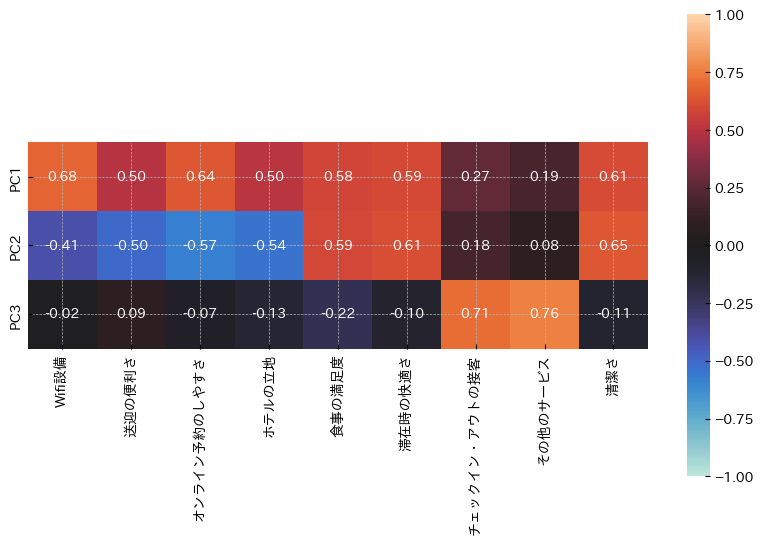

In [ ]:
# 可視化して確認
sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

#主成分分析の可視化

In [ ]:
# 主成分得点でプロットする
def feature_plot(x=1, y=2):
    plt.figure(figsize=(6, 6))
    plt.title(f'第{x}, 第{y}主成分得点のプロット')
    plt.scatter(feature[:, x-1], feature[:, y-1], alpha=0.8, c=list(df.iloc[:, -1]))
    plt.xlabel(f'PC{x}')
    plt.ylabel(f'PC{y}')
    plt.colorbar()
    plt.show()

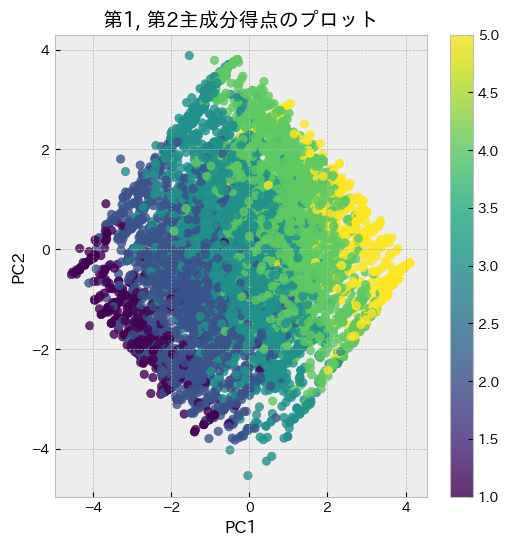

In [ ]:
feature_plot(1, 2)

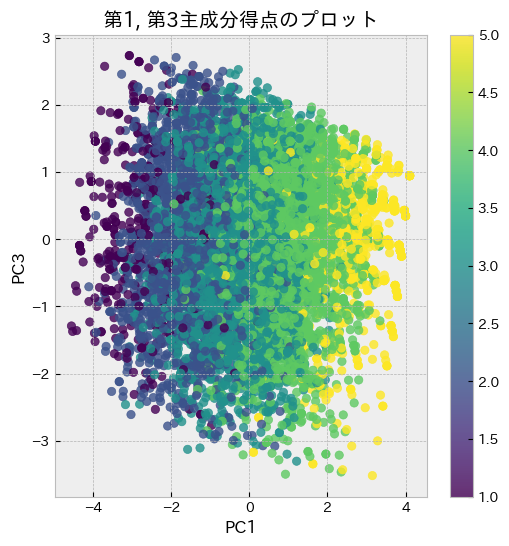

In [ ]:
feature_plot(1, 3)

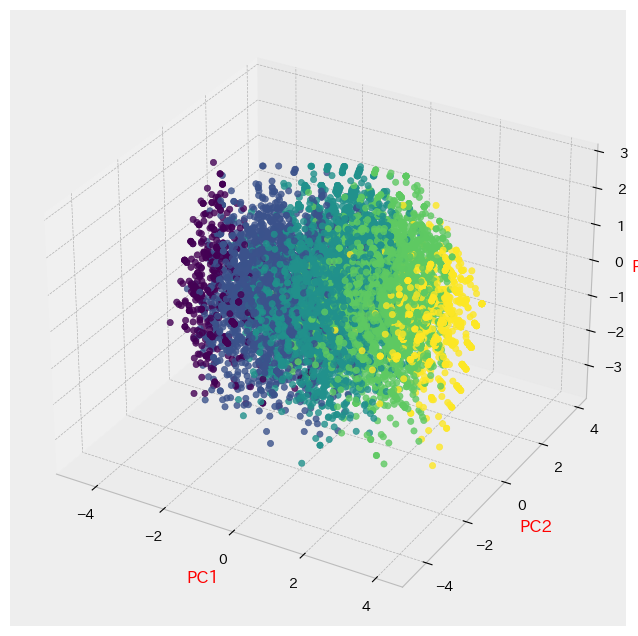

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', c='r')
ax.set_ylabel('PC2', c='r')
ax.set_zlabel('PC3', c='r')
ax.scatter(feature[:, 0], feature[:, 1], feature[:, 2], alpha=0.8, c=list(df.iloc[:, -1]))
plt.show();

In [ ]:
# 各主成分をDataFrame型で取得
_df_feature = pd.DataFrame(feature[:, :3] , columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
_df_feature.head(3)

,総合評価,ホテルの環境評価,接客の評価
0,1.637654,-0.645483,0.390539
1,-0.286120,-3.307718,1.719181
2,-2.570091,-0.054585,-1.248974


In [ ]:
# 元のデータと結合
df_new = pd.concat([df, _df_feature], axis=1)
df_new.head()


,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,総合評価,ホテルの環境評価,接客の評価
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,1.637654,-0.645483,0.390539
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,-0.286120,-3.307718,1.719181
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3,-2.570091,-0.054585,-1.248974
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3,0.985539,-0.149397,0.283761
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4,1.121424,0.404443,0.405535


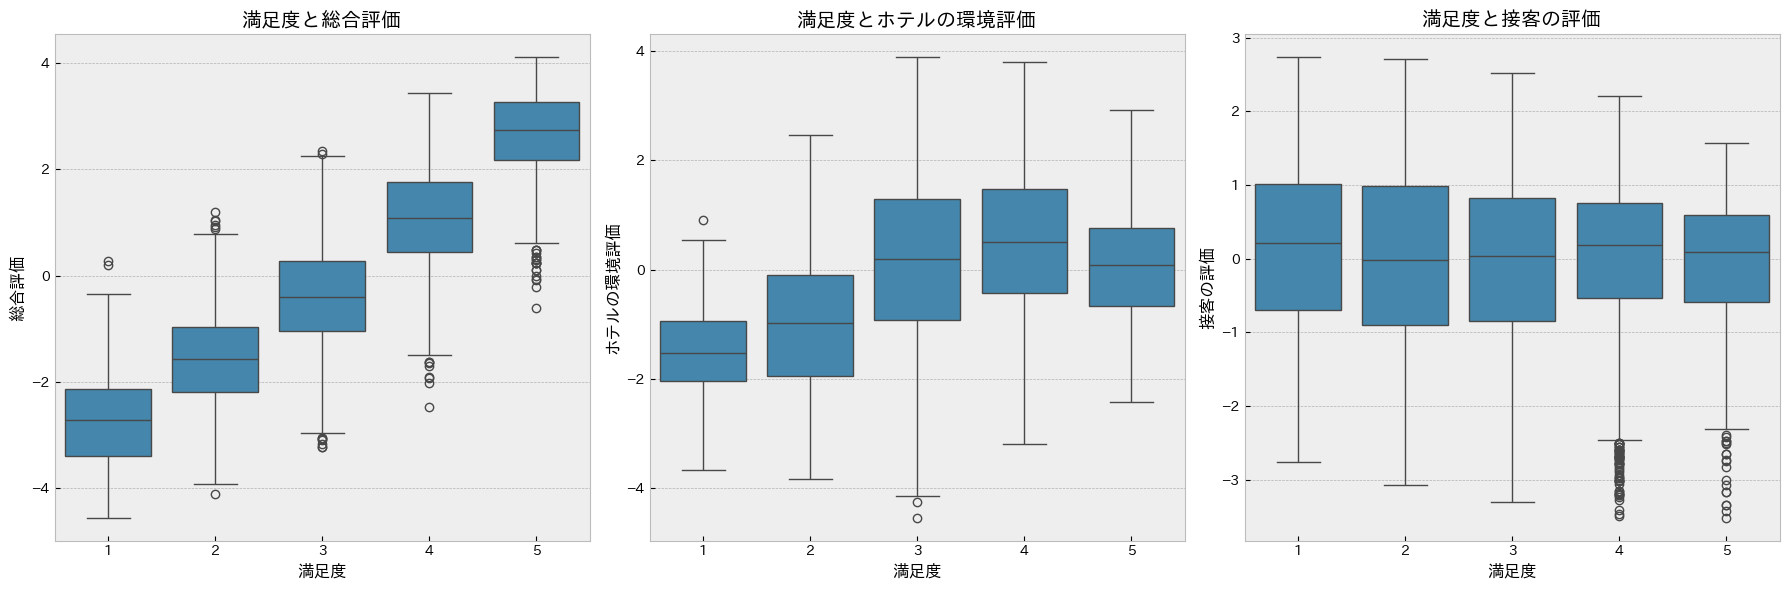

In [ ]:
# 満足度別に箱ひげ図で可視化
plt.rcParams['figure.figsize'] = 18, 6
plt.subplot(1, 3, 1)
plt.title('満足度と総合評価')
sns.boxplot(x='満足度', y='総合評価', data=df_new)
plt.subplot(1, 3, 2)
plt.title('満足度とホテルの環境評価')
sns.boxplot(x='満足度', y='ホテルの環境評価', data=df_new)
plt.subplot(1, 3, 3)
plt.title('満足度と接客の評価')
sns.boxplot(x='満足度', y='接客の評価', data=df_new)
plt.tight_layout();

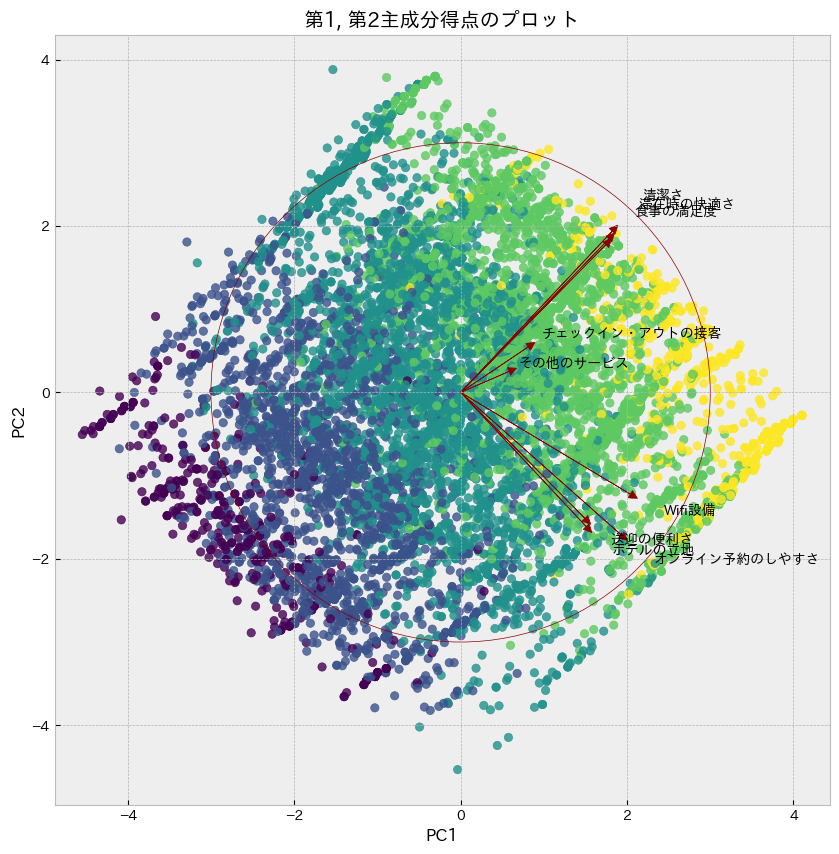

In [ ]:
import matplotlib.patches as patches

# 主成分得点プロット
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.title(f'第1, 第2主成分得点のプロット')
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, -1]))
plt.xlabel(f'PC1')
plt.ylabel(f'PC2')

# 主成分負荷量を図示
pc1 = factor_loading[0] # 第一主成分の主成分負荷量
pc2 = factor_loading[1] # 第二主成分の主成分負荷量
arrow_magnification = 3 # 矢印の倍率
feature_names = data.columns.to_list() # カラム名の取得

# ガイド円
patch_circle = patches.Circle(
    xy=(0, 0), # ガイド円の中心の設定
    radius=1 * arrow_magnification, # 半径の設定
    ec='darkred', # 円の色
    fill=False # 円内の塗りつぶし
    )

# ガイド円をグラフ上に追加
ax.add_patch(patch_circle)

# 矢印と変数ラベルの追加
for i in range(len(feature_names)):
  # 矢印の表示と設定
  ax.arrow(0, 0, # 矢印の中心の設定
           pc1[i] * arrow_magnification, # 矢印の長さの設定
           pc2[i] * arrow_magnification, # 矢印の長さの設定
           head_width=0.1, # 矢印の頭の設定
           head_length=0.1, # 矢印の頭の設定
          color='darkred' # 矢印の色
          )
  # 変数ラベル
  ax.text(pc1[i] * arrow_magnification * 1.2,
          pc2[i] * arrow_magnification * 1.2,
          feature_names[i])

plt.axis('equal')
plt.show()